## DATA SCIENCE AND BUSINESS ANALYTICS AT SPARKS FOUNDATION

### Name : Abhishek Gupta

### Task 1 : Predict The Marks Of Student Based On No. Of Study Hours using Supervised Machine Leaning

Importing All The Required Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Reading The Data From Datasets

In [2]:
df=pd.read_csv("D:\Downloads\student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Plotting The Graph WithRespect o Hours And Percentage Scored

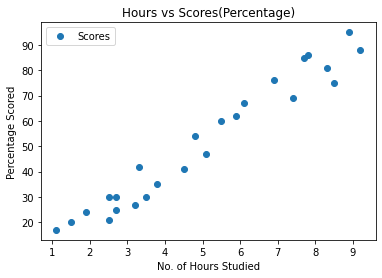

In [6]:
df.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Scores(Percentage)')
plt.xlabel('No. of Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

Prepare The Data and Split it in Test Data

In [7]:
#spliting the training and twsting data
x=df.iloc[:, :-1].values
y=df.iloc[:,1].values

#spliting the data in two
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.80,test_size=0.20,random_state=0)

Traning The Model

In [8]:
linearRegressor = LinearRegression()
linearRegressor.fit(x_train,y_train)
y_predict=linearRegressor.predict(x_train)

Fitting The Data Into The Model

In [9]:
regression= LinearRegression()
regression.fit(x_train,y_train)
print('Training Completed')

Training Completed


Now , Plotting The Regression Line

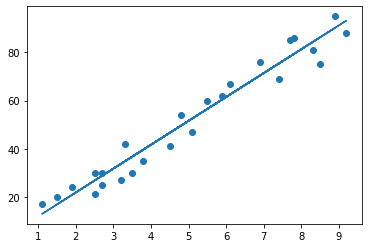

In [10]:
line = regression.coef_*x+regression.intercept_

#plotting for the data Set
plt.scatter(x,y)
plt.plot(x,line)
# plt.title('Hours vs Scores(Percentage)')
# plt.xlabel('No. of Hours Studied')
# plt.ylabel('Percentage Scored')
plt.show()

Now , Predicting The Marks(Percentage)

In [11]:
pred_y = regression.predict(x_test)
prediction= pd.DataFrame({ 'Hours':[i[0] for i in x_test] , 'Predicted_Marks':[k for k in pred_y]})
prediction

,Hours,Predicted_Marks
0,1.5,16.884145
1,3.2,33.732261
2,7.4,75.357018
3,2.5,26.794801
4,5.9,60.491033


Now , Checking the accuracy scores for traning and test set

In [12]:
print('Test Score')
print(regression.score(x_test,y_test))

print('\nTraining Score')
print(regression.score(x_train,y_train))

Test Score
0.9454906892105355

Training Score
0.9515510725211552


Comparing the predicted marks with the actual marks

In [13]:
compare_score  =pd.DataFrame({ 'Actual_Marks':y_test, 'Predicted_marks':pred_y})
compare_score

,Actual_Marks,Predicted_marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Visualisation of compared the actual marks vs compared marks

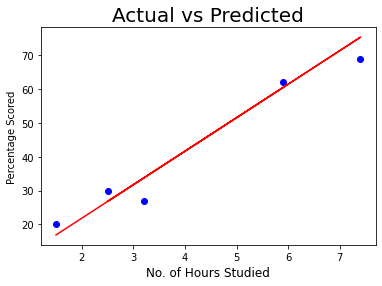

In [14]:
plt.scatter(x=x_test,y=y_test,color='blue')
plt.plot(x_test,pred_y,color='red')
plt.title('Actual vs Predicted' , size=20)
plt.xlabel('No. of Hours Studied',size=12)
plt.ylabel('Percentage Scored')
plt.show()

Now , Calculating the accracy of the model

In [15]:
print('mean absolute error : ', mean_absolute_error(y_test,pred_y))

mean absolute error :  4.183859899002975


In [16]:
print('mean squared error : ', mean_squared_error(y_test,pred_y))

mean squared error :  21.598769307217406


In [17]:
from math import sqrt

rms=sqrt(mean_squared_error(y_test,pred_y))
print(rms)

4.647447612100367


In [18]:
# Now predict the marks if student studied for 9.25 hours
print('Score of the student who studied 9.25 hours/day : ',regression.predict([[9.25]]))

Score of the student who studied 9.25 hours/day :  [93.69173249]


If the student studied 9.25 hours in a day then the predicted score is